#IMAGE SHARPENING


In [105]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import matplotlib.image as mpimg
import cv2

def rgb2gray(rgb_image):
    return np.dot(rgb_image[...,:3], [0.301, 0.678, 0.134])

# Load the image
image = mpimg.imread("/content/BIRD.jpeg")
image_gr = rgb2gray(image)
plt.set_cmap("gray")

<Figure size 640x480 with 0 Axes>

###Laplacian Kernel

In [106]:

# Define the Laplacian kernel
laplacian_kernel = np.array([[0, 1, 0],
                              [1, -4, 1],
                              [0, 1, 0]])

def convolve(image, kernel):
    return convolve2d(image, kernel, mode='same', boundary='fill', fillvalue=0)

def sharpen_image(image):
    # Convolve the image with the Laplacian kernel
    edges = convolve(image, laplacian_kernel)

    # Add the original image to the Laplacian-filtered image to sharpen
    sharpened = np.clip(image + edges, 0, 240).astype(np.uint8)
    return sharpened

# Sharpen the image
sharpened_image = sharpen_image(image_gr)


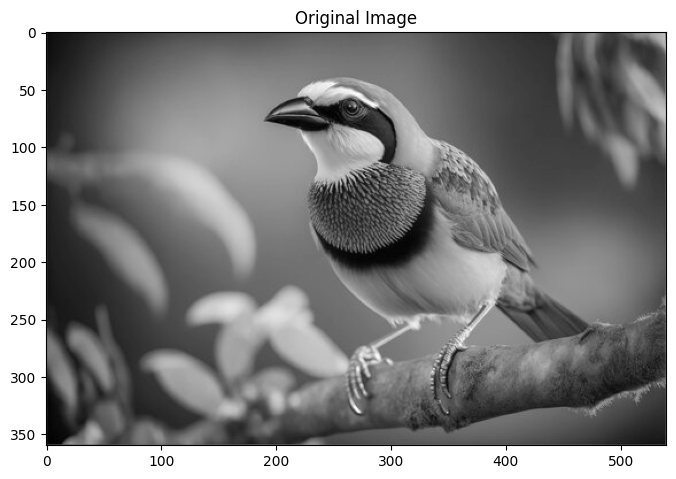

In [107]:
# Display the images
plt.figure(figsize=(8, 6))
plt.imshow(image_gr)
plt.title('Original Image')
plt.show()

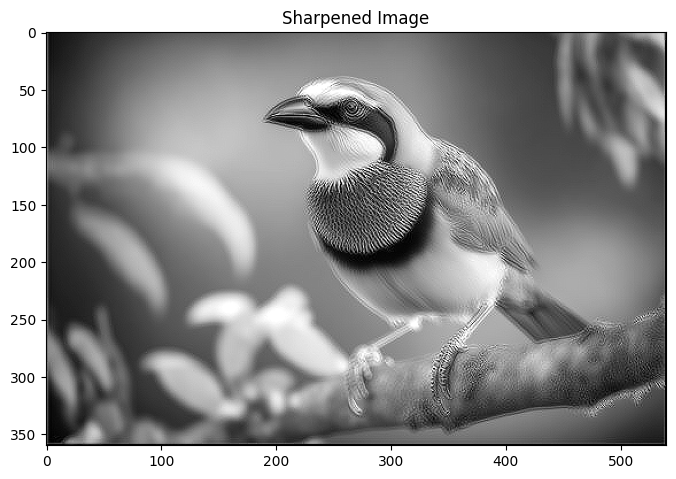

In [108]:
plt.figure(figsize=(8, 6))
plt.imshow(sharpened_image)
plt.title('Sharpened Image')
plt.show()

###High Boost Filtering

In [109]:

def high_boost_filter(image, kernel_size, k):
    # Apply Gaussian blur
    blurred = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    # Compute the high-pass filter (original image - blurred image)
    high_pass = image - blurred
    # Apply the high-boost filter
    sharpened = image + k * high_pass

    # Clip the values to ensure they are within [0, 255]
    sharpened = np.clip(sharpened, 0, 255)

    # Convert back to uint8
    sharpened = sharpened.astype(np.uint8)

    return sharpened

# Apply high-boost filtering with kernel size 3 and k=1.5
sharpened_image = high_boost_filter(image, 3, 1.5)
sharpened_image_gray = sharpen_image(image_gr)


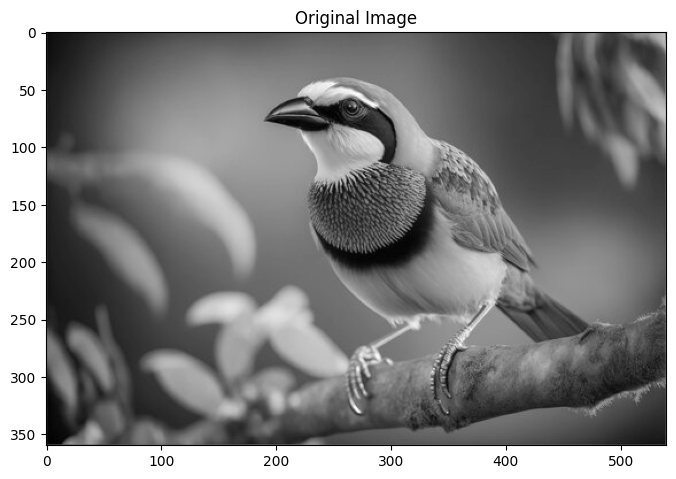

In [110]:
# Display the images
plt.figure(figsize=(8, 6))
plt.imshow(image_gr)
plt.title('Original Image')
plt.show()


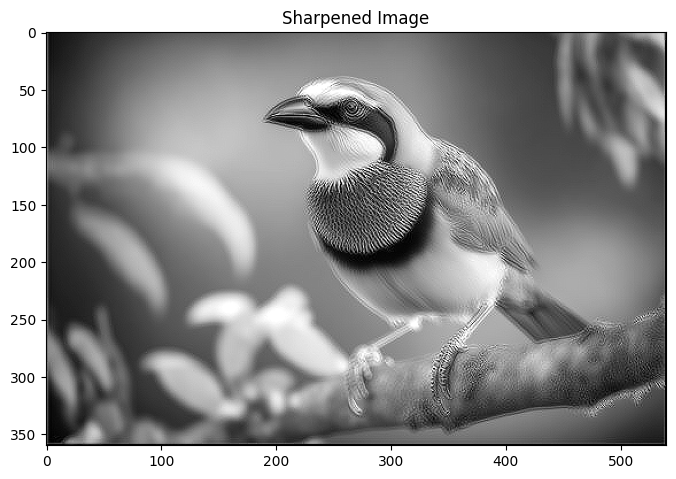

In [111]:
plt.figure(figsize=(8, 6))
plt.set_cmap("gray")
plt.imshow(sharpened_image_gray)
plt.title('Sharpened Image')
plt.show()